<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/ChurnCustomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict Customer Churn
Logistic Regression

In [ ]:
import pandas as pd
import seaborn as sns
df=pd.read_csv("data_regression.csv")

In [ ]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [ ]:
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [ ]:
#Check for missing values
df.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [ ]:
df.isnull().any(axis=1).sum()

82

<AxesSubplot:>

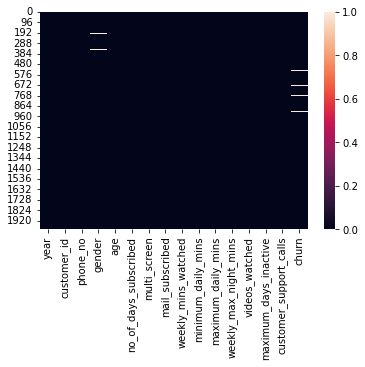

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df=df.dropna()

In [ ]:
# function for encoding categorical variables
def encode_categories (df,variables):
  from sklearn.preprocessing import OrdinalEncoder
  ord_enc = OrdinalEncoder() 
  for v in variables:
    name = v+'_code' # add _code for encoded variables
    df[name] = ord_enc.fit_transform(df[[v]])
    print('The encoded values for '+ v + ' are:')
    print(df[name].unique())

In [ ]:
encode_categories (df,['gender','multi_screen','mail_subscribed'])

The encoded values for gender are:
[0. 1.]
The encoded values for multi_screen are:
[0. 1.]
The encoded values for mail_subscribed are:
[0. 1.]


C:\Users\uzmam\AppData\Local\Temp/ipykernel_25416/4132747818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = ord_enc.fit_transform(df[[v]])
C:\Users\uzmam\AppData\Local\Temp/ipykernel_25416/4132747818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = ord_enc.fit_transform(df[[v]])
C:\Users\uzmam\AppData\Local\Temp/ipykernel_25416/4132747818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [ ]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_code,multi_screen_code,mail_subscribed_code
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,0.0,0.0,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,0.0,0.0,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0,0.0,0.0,0.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,0.0,0.0,1.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0,0.0,0.0,0.0


In [ ]:
#Data Visualization
def plot_scatterplots (df,cols_to_exclude,class_col):
  #this function returns scatterplots of all the variables in the dataset
  #against the classification variable,
  #for a quick data visualization
  import numpy as np
  import seaborn as sns
  import warnings
  warnings.filterwarnings("ignore")
  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  for col in X.columns.difference([class_col]):
    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, col, class_col)

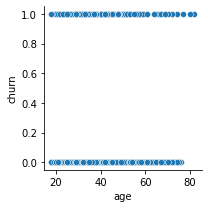

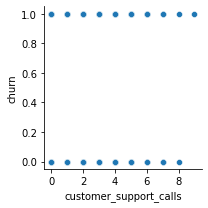

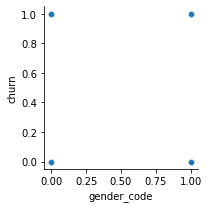

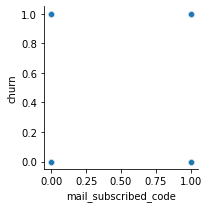

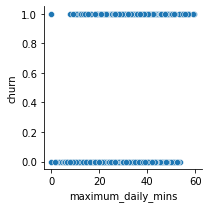

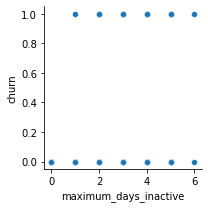

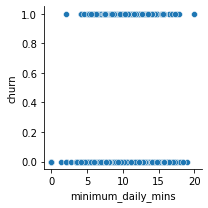

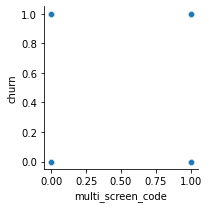

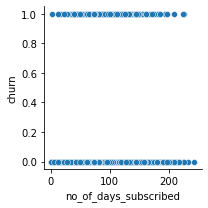

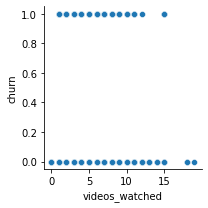

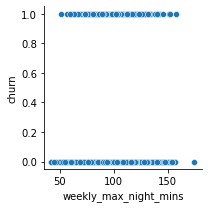

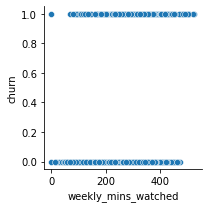

In [ ]:
# plot 
plot_scatterplots (df,['customer_id','phone_no', 'year'],'churn')

In [ ]:
def full_diagnostic(df,class_col,cols_to_exclude):
  import seaborn as sns
  import numpy as np
  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  sns.pairplot(df,hue = class_col)

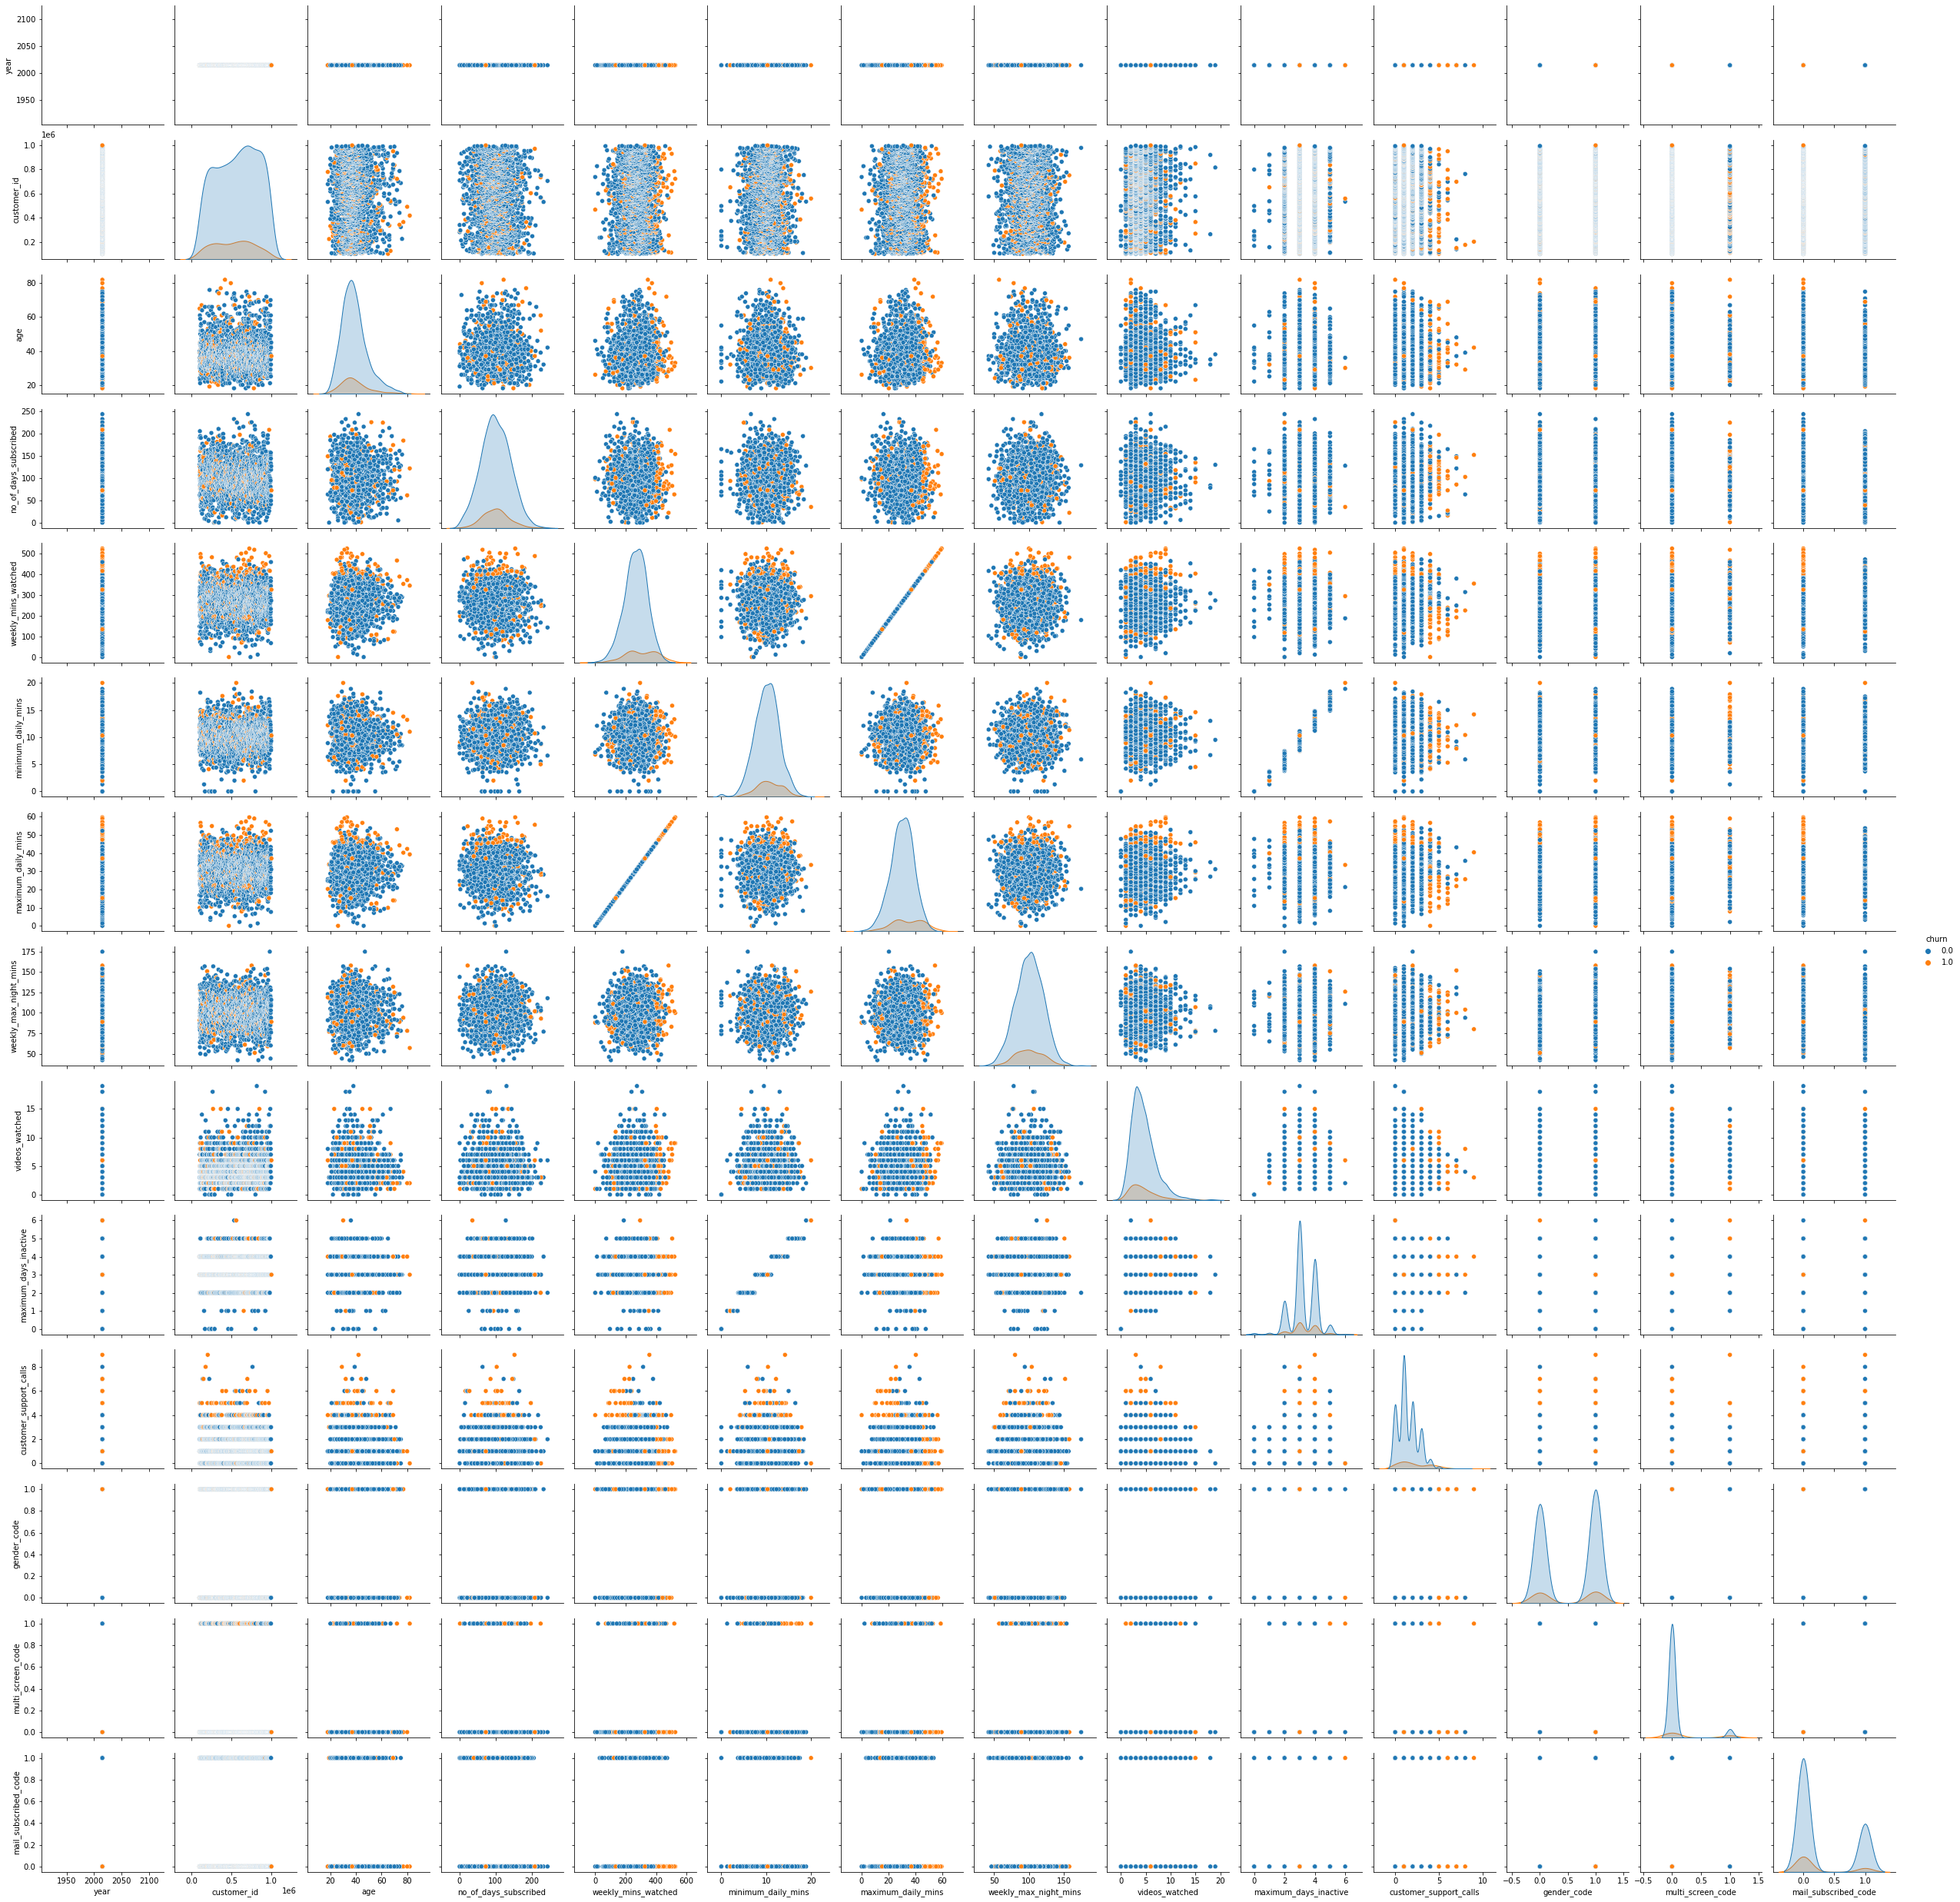

In [ ]:
full_diagnostic(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [ ]:
def logistic_regression(df,class_col,cols_to_exclude):
  import statsmodels.api as sm
  import numpy as np
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])] 
  X = X[X.columns.difference(cols_to_exclude)] # unwanted columns 

  ## Scaling variables
  ##from sklearn import preprocessing
  ##scaler = preprocessing.StandardScaler().fit(X)
  ##X_scaled = scaler.transform(X)


  #X_Scale = scaler.transform(X)
  y=df[class_col] # the target variable 
  logit_model=sm.Logit(y,X) 
  result=logit_model.fit() # fit the model 
  print(result.summary2()) # check for summary 

In [ ]:
logistic_regression(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

Optimization terminated successfully.
         Current function value: 0.336585
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.137     
Dependent Variable:   churn              AIC:                1315.1404 
Date:                 2022-04-19 14:57   BIC:                1381.8488 
No. Observations:     1918               Log-Likelihood:     -645.57   
Df Model:             11                 LL-Null:            -748.02   
Df Residuals:         1906               LLR p-value:        7.1751e-38
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
age                    -0.0208   0.0068 -3.0739 0.0021  -0.0340

In [ ]:
def prepare_model(df,class_col,cols_to_exclude):
## Split in training and test set
  from sklearn.model_selection import train_test_split
  import numpy as np
  ##Selecting only the numerical columns and excluding the columns we specified in the function
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])] 
  X = X[X.columns.difference(cols_to_exclude)]
  ##Selecting y as a column
  y=df[class_col]
  global X_train, X_test, y_train, y_test #This allow us to do call these variables outside this function
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # perform train test split

In [ ]:
def run_model(X_train,X_test,y_train,y_test):
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import roc_auc_score,classification_report
  global logreg #Defines the logistic model as a global model that can be used outside of this function
  ##Fitting the logistic regression
  logreg = LogisticRegression(random_state = 13)
  logreg.fit(X_train, y_train) # fit the model
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = logreg.predict(X_test) # make predictions on th test data
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  print(classification_report(y_test, y_pred)) # check for classification report 
  print("The area under the curve is: %0.2f"%logit_roc_auc)  # check for  AUC
     

In [ ]:
prepare_model(df,class_col='churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [ ]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       513
         1.0       0.47      0.13      0.20        63

    accuracy                           0.89       576
   macro avg       0.69      0.55      0.57       576
weighted avg       0.85      0.89      0.86       576

The area under the curve is: 0.55


In [ ]:
def confusion_matrix(y_test,y_pred):
  from sklearn.metrics import confusion_matrix
  confusion_matrix = confusion_matrix(y_test, y_pred) # confusion matrix 
  print(confusion_matrix)

  tn, fp, fn, tp = confusion_matrix.ravel()
  print('TN: %0.2f'% tn)
  print('TP: %0.2f'% tp)
  print('FP: %0.2f'%fp)
  print('FN: %0.2f'%fn)

In [ ]:
def roc_curve (logreg,X_test,y_test):
  import matplotlib.pyplot as plt 
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import roc_curve
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score 
  fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test)) # ROC curve
  #Setting the graph area
  plt.figure()
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

  #Plotting the worst line possiple
  plt.plot([0, 1], [0, 1],'b--')

  #Plotting the logistic regression we have built
  plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

  #Adding labels and etc
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

In [ ]:
prepare_model(df,class_col='churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [ ]:
confusion_matrix(y_test,y_pred)

[[504   9]
 [ 55   8]]
TN: 504.00
TP: 8.00
FP: 9.00
FN: 55.00


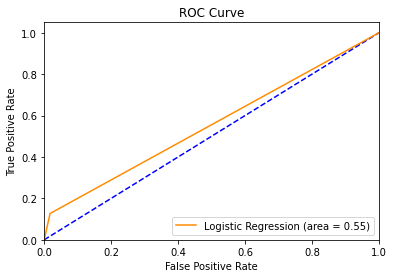

In [ ]:
roc_curve (logreg,X_test,y_test)

In [ ]:
#Save and run the model
# save the model using pickle function 
import pickle
pickle.dump(logreg, open('model1.pkl', 'wb'))

In [ ]:
# load the saved model 
model = pickle.load(open('model1.pkl', 'rb'))

In [ ]:
# make predictions on the test data
model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
# check the target variable
df['churn'].describe()

count    1918.000000
mean        0.131908
std         0.338479
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

In [ ]:
# class imbalance method 1 
def run_model_bweights(X_train,X_test,y_train,y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight = 'balanced') # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model 
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score
    print(classification_report(y_test, y_pred)) 
    print("The area under the curve is: %0.2f"%logit_roc_auc) # AUC curve

In [ ]:
run_model_bweights(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84       513
         1.0       0.27      0.78      0.40        63

    accuracy                           0.75       576
   macro avg       0.62      0.76      0.62       576
weighted avg       0.89      0.75      0.79       576

The area under the curve is: 0.76


In [ ]:
# class imbalance method 2
def run_model_aweights(X_train,X_test,y_train,y_test,w):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight=w) # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model 
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))  # ROC AUC score
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%logit_roc_auc)  # AUC curve

In [ ]:
run_model_aweights(X_train,X_test,y_train,y_test,{0:90, 1:10})

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       513
         1.0       1.00      0.02      0.03        63

    accuracy                           0.89       576
   macro avg       0.95      0.51      0.49       576
weighted avg       0.90      0.89      0.84       576

The area under the curve is: 0.51


In [ ]:
def prepare_model_smote(df,class_col,cols_to_exclude):
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input. 
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

In [ ]:
#prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])
#run_model(X_train,X_test,y_train,y_test)

In [ ]:
class_col = 'churn'
cols_to_exclude=['customer_id','phone_no', 'year']

# function for feature selection 
def var_threshold_selection(df,cols_to_exclude,class_col,threshold):
  from sklearn.feature_selection import VarianceThreshold
  import numpy as np
  from sklearn import preprocessing

  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  ## Scaling variables
  scaler = preprocessing.StandardScaler().fit(X)
  X_scaled = scaler.transform(X)
  var_thr = VarianceThreshold(threshold = threshold) #Removing both constant and quasi-constant
  var_thr.fit(X_scaled)
  var_thr.get_support()

  global selected_cols
  selected_cols = X.columns[var_thr.get_support()]

  print("The selected features are: ")
  print(list(selected_cols))

In [ ]:
#var_threshold_selection(df,cols_to_exclude=['customer_id','phone_no', 'year'],class_col = 'churn',threshold=1)